## Run the cell below by clicking in it and hitting shift-enter

## I want to talk about Natural Language Processing and Natural Language Generation (Creating Text like ChatGPT). 

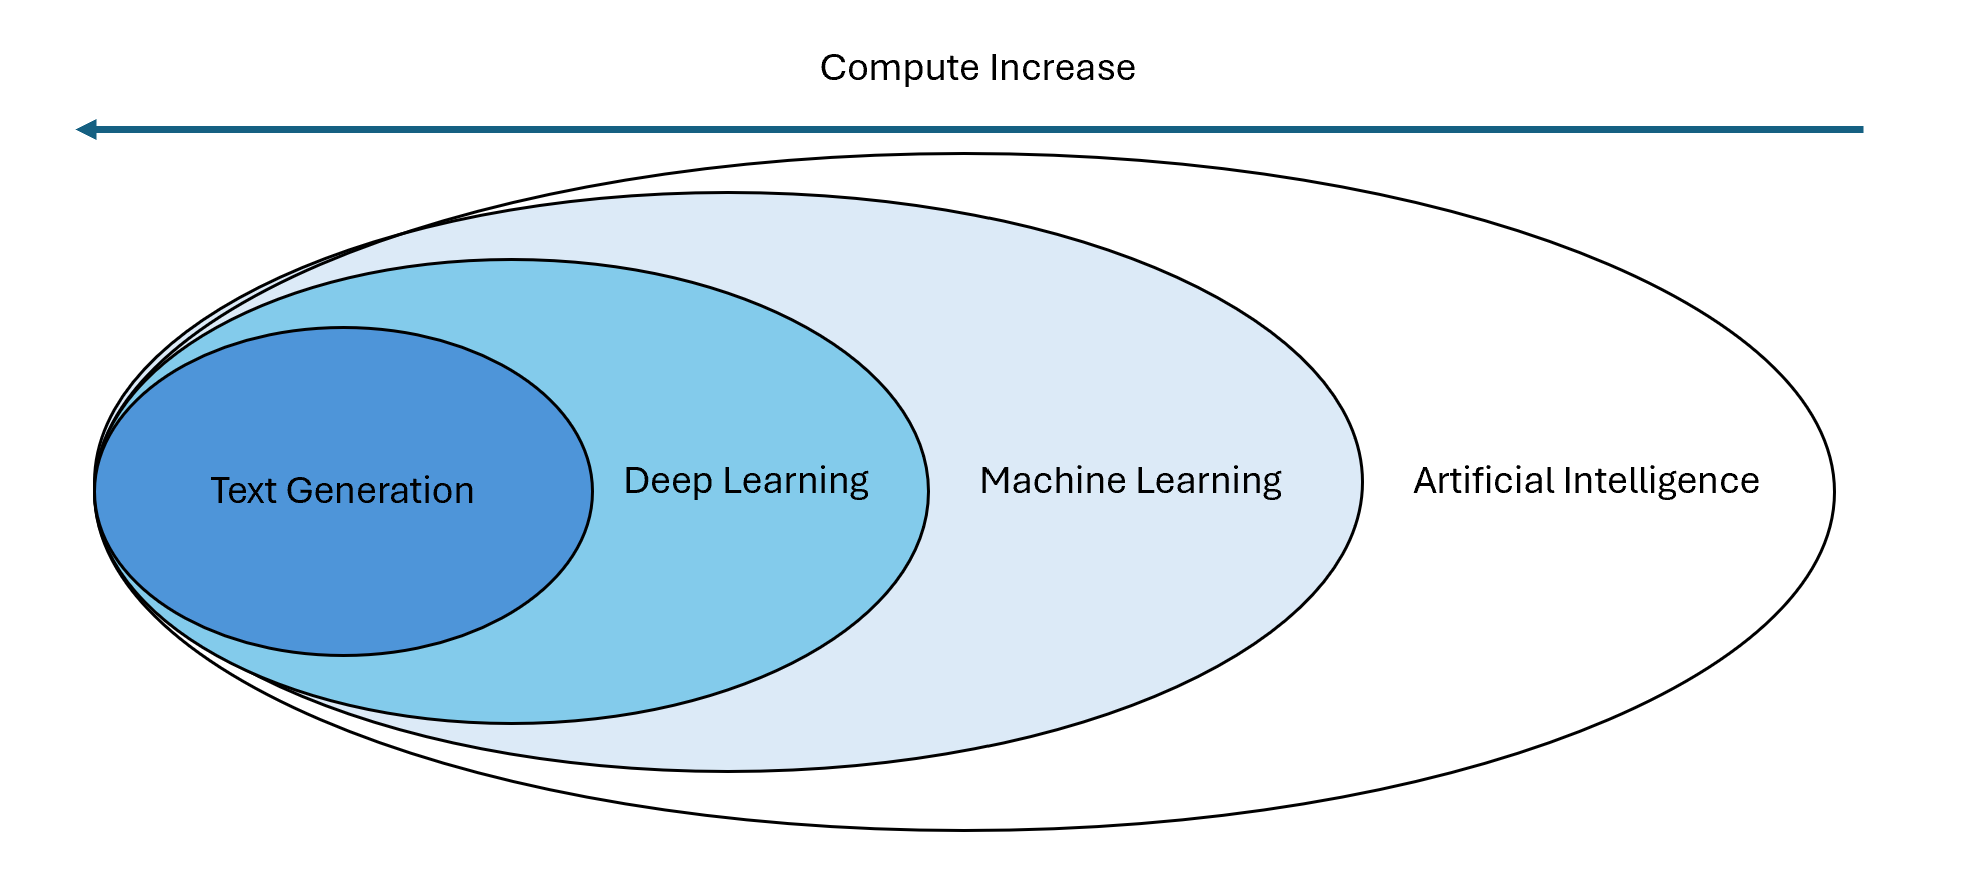

In [1]:
from IPython.display import Image

# Specify the path to the image file
image_path_diagram = 'AI-diagram.png'

# Display the image
Image(filename=image_path_diagram)

### How AI Works

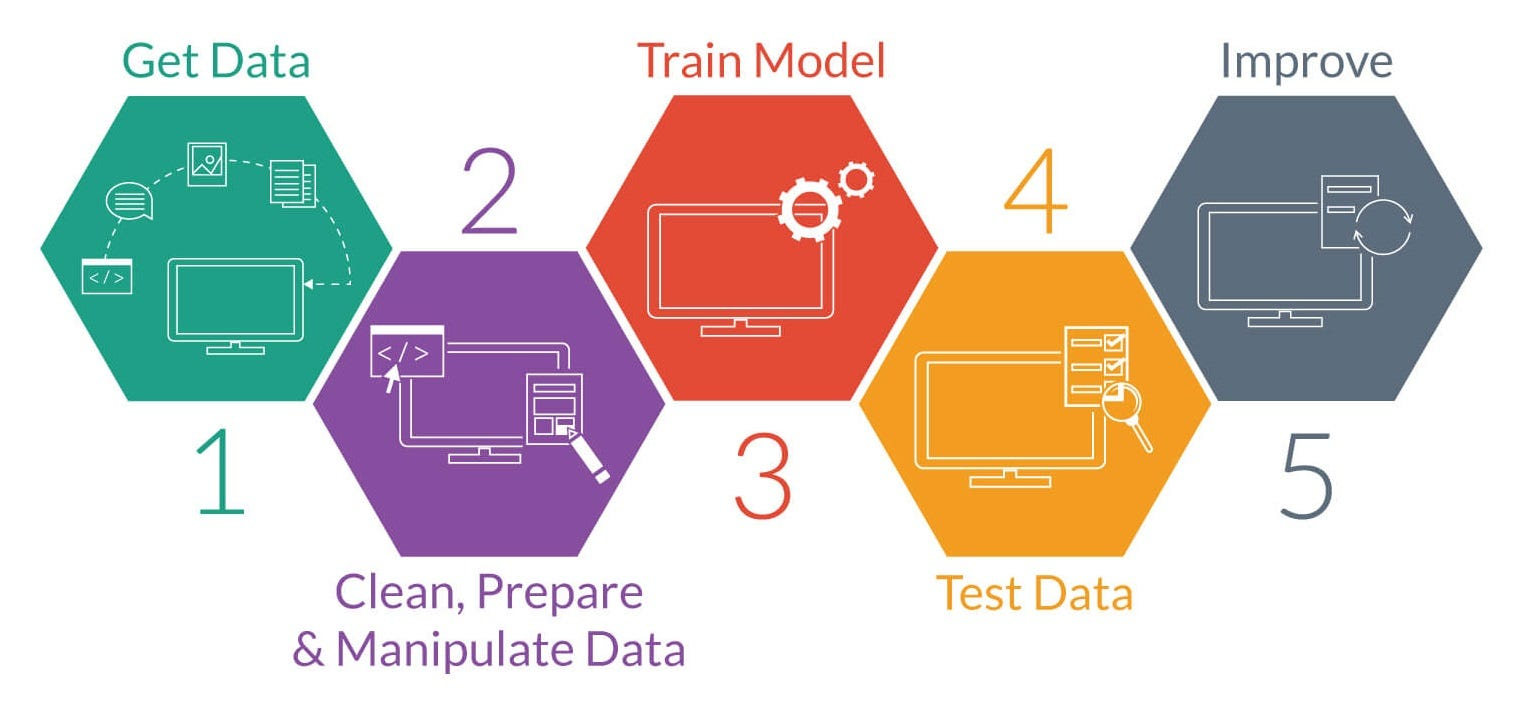

In [2]:
# Specify the path to the image file
image_path_process = 'AI-process.jpg'

# Display the image
Image(filename=image_path_process)

##### 1min video on the subject

https://www.youtube.com/watch?v=0esRXRo1cZY

## Since Computers work strictly with numbers so I first have to have a model to map words into numerical representations (called vectors).

To do that I have to install some additional packages (run the cell below by clicking in it and hitting shift-enter)

In [3]:
!pip install gensim

Now I'm going to import some libraries to run my code (shift-enter to run)

In [4]:
import gensim.downloader as api
import numpy as np

Download and load the pre-trained model from Twitter and "vectorizing" two words, king and queen (may take a minute or two to run)

In [7]:
# Download and load the pre-trained model from Twitter
word2vec_model = api.load("glove-twitter-25")

# Get word vectors
word_vector1 = word2vec_model['king']
word_vector2 = word2vec_model['queen']

Lets see what king and queen look like as numerical representations

In [6]:
# Run this cell
print("Word Vector 1 (king):", word_vector1)
print("Word Vector 2 (queen):", word_vector2)

Word Vector 1 (king): [-0.74501  -0.11992   0.37329   0.36847  -0.4472   -0.2288    0.70118
  0.82872   0.39486  -0.58347   0.41488   0.37074  -3.6906   -0.20101
  0.11472  -0.34661   0.36208   0.095679 -0.01765   0.68498  -0.049013
  0.54049  -0.21005  -0.65397   0.64556 ]
Word Vector 2 (queen): [-1.1266   -0.52064   0.45565   0.21079  -0.05081  -0.65158   1.1395
  0.69897  -0.20612  -0.71803  -0.02811   0.10977  -3.3089   -0.49299
 -0.51375   0.10363  -0.11764  -0.084972  0.02558   0.6859   -0.29196
  0.4594   -0.39955  -0.40371   0.31828 ]


## Discussion Question: What are some of operations we can preform on these words, now that they are vectors? What do you think will happen?

Student Answer (double click to type here):

## Scroll Down to Next Section

In [10]:
print(word_vector1 + word_vector2)

[-1.87161    -0.64056003  0.82894003  0.57926    -0.49801    -0.88038
  1.84068     1.5276899   0.18874    -1.3015      0.38677     0.48051
 -6.9995003  -0.694      -0.39903003 -0.24298     0.24444     0.010707
  0.00793     1.3708799  -0.340973    0.99988997 -0.6096     -1.05768
  0.96384   ]


In [12]:
print(word_vector1 - word_vector2)

[ 0.38159     0.40072    -0.08236     0.15768002 -0.39639     0.42277998
 -0.43832004  0.12974995  0.60098     0.13455999  0.44299     0.26097
 -0.3816998   0.29197997  0.62847    -0.45024002  0.47972     0.18065101
 -0.04323    -0.00092     0.242947    0.08108997  0.18949999 -0.25026
  0.32728   ]


In [13]:
print(word_vector1 * word_vector2)

[ 8.3932829e-01  6.2435150e-02  1.7008959e-01  7.7669792e-02
  2.2722233e-02  1.4908150e-01  7.9899460e-01  5.7925040e-01
 -8.1388541e-02  4.1894895e-01 -1.1662276e-02  4.0696129e-02
  1.2211826e+01  9.9095918e-02 -5.8937404e-02 -3.5919193e-02
 -4.2595092e-02 -8.1300363e-03 -4.5148702e-04  4.6982774e-01
  1.4309836e-02  2.4830109e-01  8.3925478e-02  2.6401424e-01
  2.0546885e-01]


In [14]:
print(word_vector1 / word_vector2)

[  0.6612906    0.2303319    0.81924725   1.7480432    8.801416
   0.35114646   0.61534005   1.1856302   -1.9156802    0.81259835
 -14.759161     3.3774254    1.1153555    0.40773648  -0.22329926
  -3.344688    -3.0778646   -1.1260062   -0.6899922    0.9986587
   0.16787574   1.1765128    0.5257164    1.6199003    2.028277  ]


## Working With Vectors

Let's add these vectors together and see what we get

In [15]:
# Add the two vectors
result_vector = word_vector1 + word_vector2

# Print the results
print("Result Vector:", result_vector)

Result Vector: [-1.87161    -0.64056003  0.82894003  0.57926    -0.49801    -0.88038
  1.84068     1.5276899   0.18874    -1.3015      0.38677     0.48051
 -6.9995003  -0.694      -0.39903003 -0.24298     0.24444     0.010707
  0.00793     1.3708799  -0.340973    0.99988997 -0.6096     -1.05768
  0.96384   ]


By itself this vector doesn't mean much but let's see what the top ten most similar words are and see if they make sense

In [16]:
# Find the most similar words to the result vector (remember adding king and queen should give us various royalty)
most_similar_words = word2vec_model.similar_by_vector(result_vector, topn=10)

# Print the most similar words
print("Most Similar Words to Result Vector:")
for word, similarity in most_similar_words:
    print(f"{word}: {similarity}")

Most Similar Words to Result Vector:
king: 0.9806498885154724
queen: 0.9790497422218323
prince: 0.9494946002960205
lady: 0.9438114166259766
aka: 0.9265403747558594
hero: 0.9069766402244568
's: 0.9044355154037476
jack: 0.9005230665206909
princess: 0.9002885818481445
star: 0.8977693915367126


Not a 100% match but as you can see a lot of these are related to royalty (prince, lady, jack, etc). Let's expand this back to Natural Languange Generation

## Explaination 
#### Back to the Original Diagram

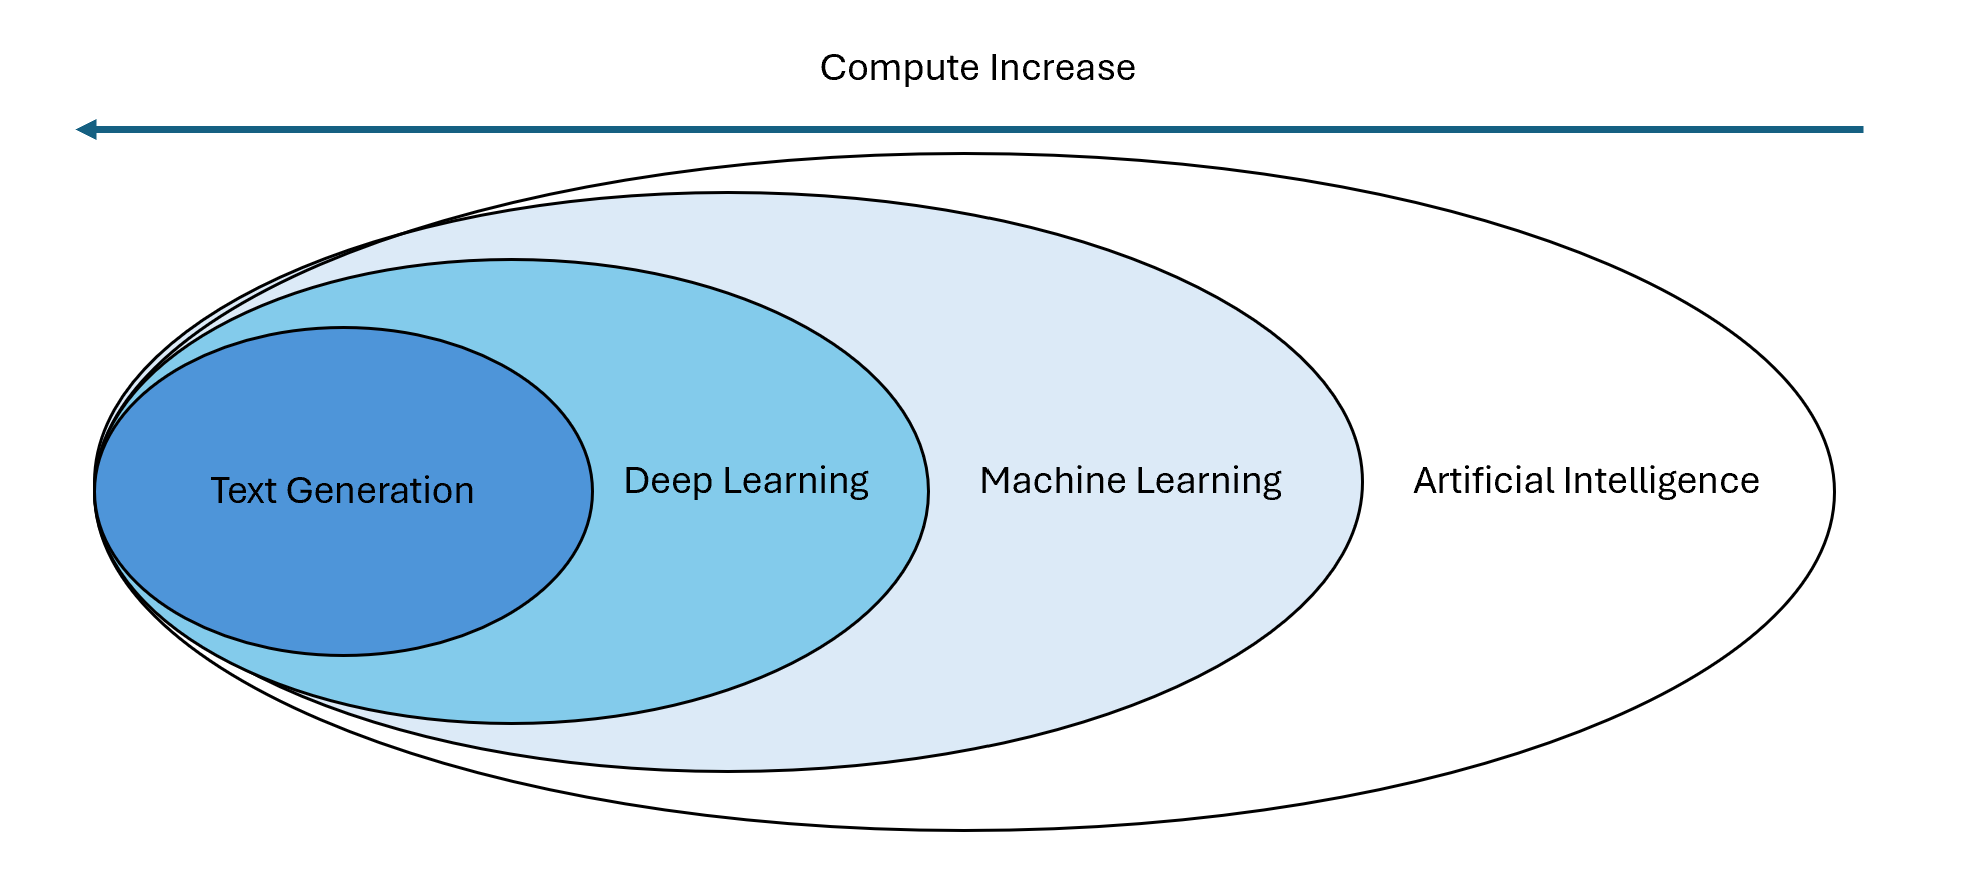

In [17]:
# Display the image
Image(filename=image_path_diagram)

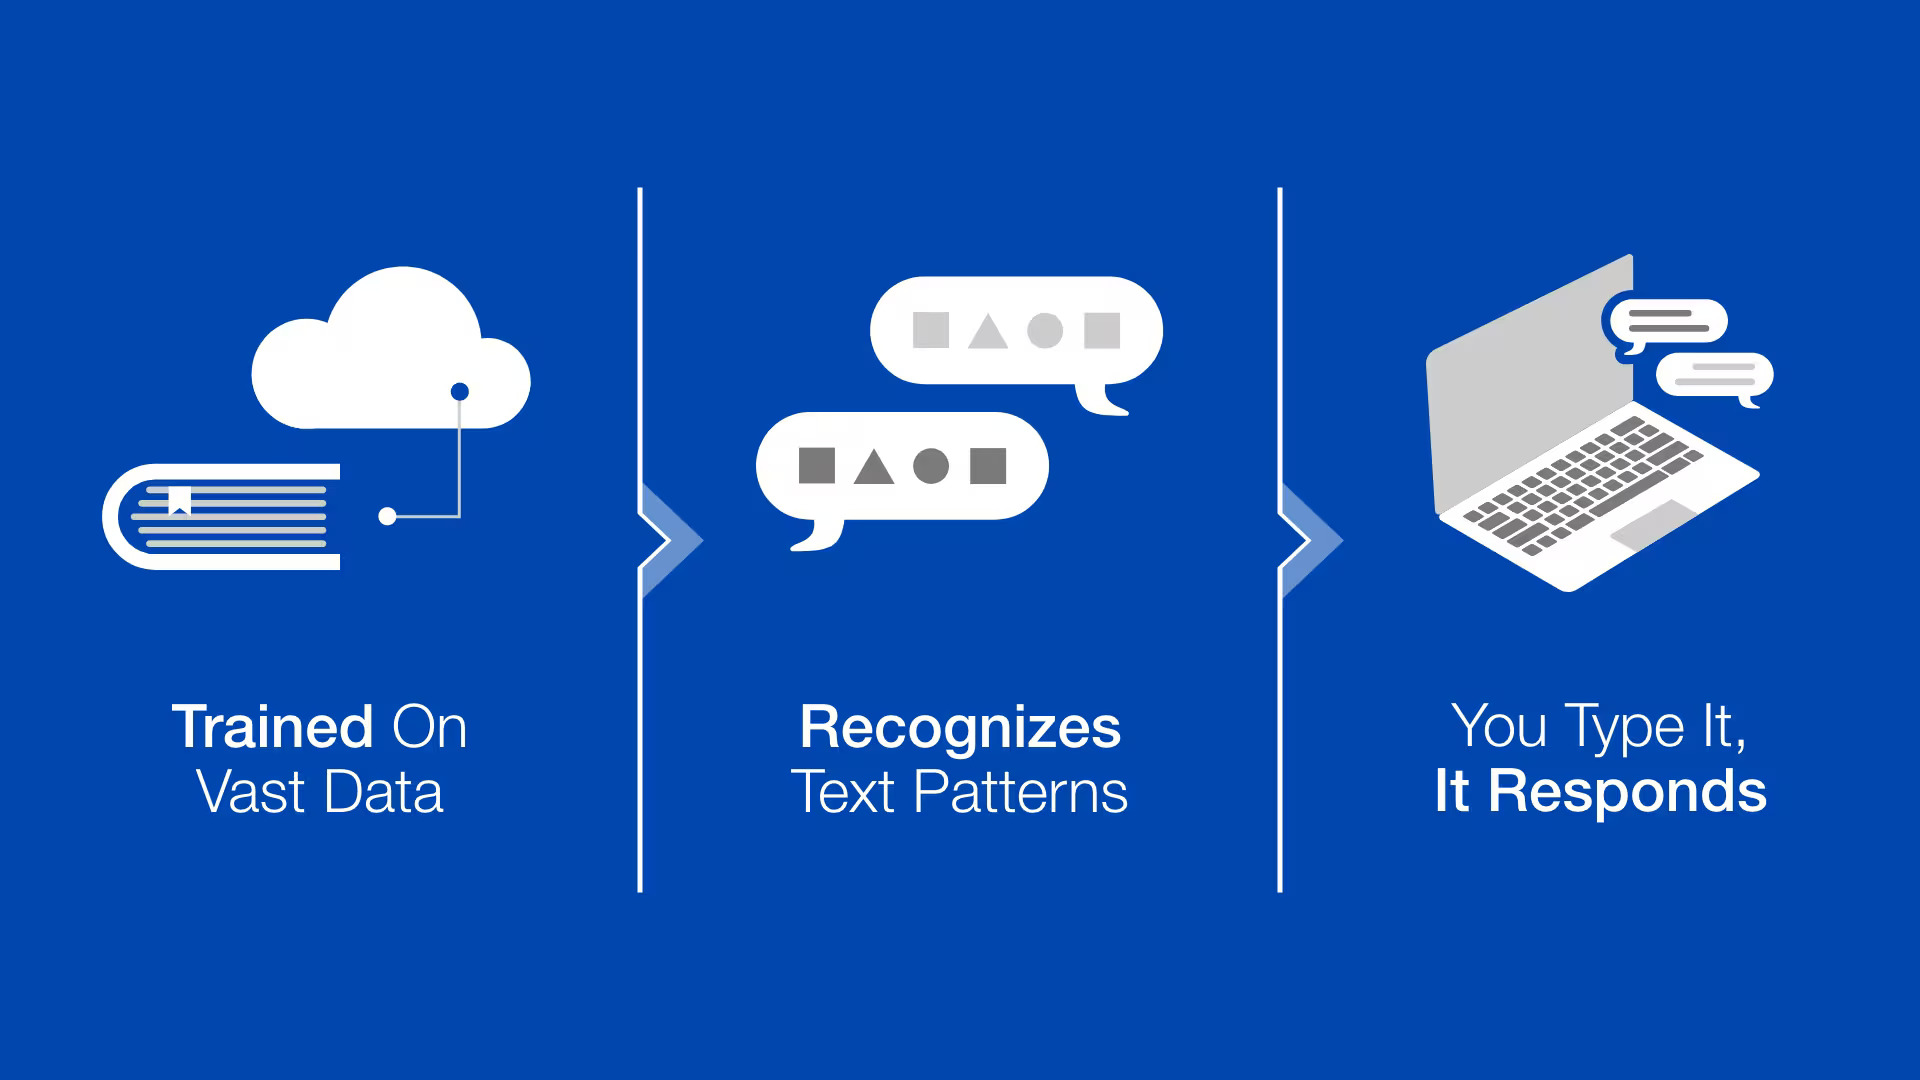

In [18]:
# Specify the path to the image file
image_path_ChatGPT = 'Chat-GPT.jpg'

# Display the image
Image(filename=image_path_ChatGPT)

## Word2Vec Playground - Feel free to mix and match words or expand the list

In [19]:
# Get word vectors
student_word_vector1 = word2vec_model['student'] # Feel free to change this word or add additional words
student_word_vector2 = word2vec_model['teacher']

# Add the two vectors
student_result_vector = student_word_vector1 + student_word_vector2

# Print the results
print("Student Word Vector 1 :", student_word_vector1)
print("Word Vector 2 (queen):", student_word_vector2)
print("Result Vector:", student_result_vector)

Student Word Vector 1 : [ 0.21425   0.76572  -0.047929 -1.4637    0.99642  -0.46683   0.56335
 -0.58812   1.0889    0.24792  -0.47263  -0.17876  -3.5099    0.82986
  0.97985  -0.46292   0.74787  -0.29517  -0.14853  -0.23281   0.20884
 -0.042099 -1.3691   -0.88508  -0.77564 ]
Word Vector 2 (queen): [ 0.19484   0.33447   0.93546  -0.48329   1.1514   -1.2814    1.5305
 -0.3708    0.57756   0.24608  -0.78535  -0.32367  -3.6943    0.12604
  1.253     0.014313  1.0713    0.12095   0.07319  -0.47222   0.99402
  0.29617  -0.61875   0.097479 -0.90367 ]
Result Vector: [ 0.40908998  1.10019     0.887531   -1.94699     2.14782    -1.74823
  2.0938501  -0.95892     1.66646     0.49400002 -1.25798    -0.50243
 -7.2042      0.95589995  2.23285    -0.448607    1.81917    -0.17422001
 -0.07534    -0.70503     1.20286     0.254071   -1.98785    -0.787601
 -1.6793101 ]


Printing the results

In [20]:
student_most_similar_words = word2vec_model.similar_by_vector(student_result_vector, topn=10)

# Print the most similar words
print("Most Similar Words to Result Vector:")
for word, similarity in student_most_similar_words:
    print(f"{word}: {similarity}")

Most Similar Words to Result Vector:
teacher: 0.963818371295929
student: 0.9602292776107788
teachers: 0.9031844735145569
primary: 0.899797260761261
class: 0.8975030779838562
group: 0.8948927521705627
law: 0.889959454536438
private: 0.8884251117706299
term: 0.8844797611236572
office: 0.8840461373329163


In [21]:
new1 = word2vec_model['notes'] # Feel free to change this word or add additional words
new2 = word2vec_model['pen']

# Add the two vectors
res = new1 + new2

# Print the results
print("Word Vector 1 :", student_word_vector1)
print("Word Vector 2 :", student_word_vector2)
print("Result Vector:", student_result_vector)

Word Vector 1 : [ 0.21425   0.76572  -0.047929 -1.4637    0.99642  -0.46683   0.56335
 -0.58812   1.0889    0.24792  -0.47263  -0.17876  -3.5099    0.82986
  0.97985  -0.46292   0.74787  -0.29517  -0.14853  -0.23281   0.20884
 -0.042099 -1.3691   -0.88508  -0.77564 ]
Word Vector 2 : [ 0.19484   0.33447   0.93546  -0.48329   1.1514   -1.2814    1.5305
 -0.3708    0.57756   0.24608  -0.78535  -0.32367  -3.6943    0.12604
  1.253     0.014313  1.0713    0.12095   0.07319  -0.47222   0.99402
  0.29617  -0.61875   0.097479 -0.90367 ]
Result Vector: [ 0.40908998  1.10019     0.887531   -1.94699     2.14782    -1.74823
  2.0938501  -0.95892     1.66646     0.49400002 -1.25798    -0.50243
 -7.2042      0.95589995  2.23285    -0.448607    1.81917    -0.17422001
 -0.07534    -0.70503     1.20286     0.254071   -1.98785    -0.787601
 -1.6793101 ]


In [22]:
mostsimilar = word2vec_model.similar_by_vector(res, topn=10)

print("Most Similar Words to Result Vector:")
for word, similarity in mostsimilar:
    print(f"{word}: {similarity}")

Most Similar Words to Result Vector:
pen: 0.897262692451477
notes: 0.8960216641426086
paper: 0.8767697811126709
double: 0.8739097714424133
blank: 0.8700039982795715
fix: 0.8657246828079224
note: 0.8634711503982544
pass: 0.8631337285041809
test: 0.8619256615638733
copy: 0.8568472862243652
